# **Import Dataset**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('data tweet1a.xlsx')
df.head()

,sentimen,Tweet
0,2,Setelah sekian lama covid mlanda negri ini.. S...
1,1,Pemerintah sudah berusaha semaksimal mungkin m...
2,0,Hari senin kemaren sy harus kehilangan adik sy...
3,2,Tentang vaksin vaksin itu hanya untuk daya ta...
4,1,Ayo sama sama kita wujudkan program vaksinasi ...


# **Data Preprocessing**

## Check Data Types

In [ ]:
df.dtypes

sentimen     int64
Tweet       object
dtype: object

In [ ]:
df['sentimen'] = df['sentimen'].astype('category')

## Check Missing Values

In [ ]:
df.isnull().sum()

sentimen    0
Tweet       0
dtype: int64

# **Text Preprocessing**

## Case Folding

In [ ]:
df['Tweet'] = df['Tweet'].str.lower()
df.head()

,sentimen,Tweet
0,2,setelah sekian lama covid mlanda negri ini.. s...
1,1,pemerintah sudah berusaha semaksimal mungkin m...
2,0,hari senin kemaren sy harus kehilangan adik sy...
3,2,tentang vaksin vaksin itu hanya untuk daya ta...
4,1,ayo sama sama kita wujudkan program vaksinasi ...


## Text Cleaning

In [ ]:
import re
import string

def remove(text):
  text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', ' ')
  text = text.encode('ascii', 'replace').decode('ascii')
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", ' ', text).split())
  return text.replace('http://', ' ').replace('https://', ' ')

df['Tweet'] = df['Tweet'].apply(remove)
df.head()

,sentimen,Tweet
0,2,setelah sekian lama covid mlanda negri ini.. s...
1,1,pemerintah sudah berusaha semaksimal mungkin m...
2,0,hari senin kemaren sy harus kehilangan adik sy...
3,2,tentang vaksin vaksin itu hanya untuk daya tah...
4,1,ayo sama sama kita wujudkan program vaksinasi ...


In [ ]:
def remove_number(text):
  return re.sub(r'\d+', '', text)

df['Tweet'] = df['Tweet'].apply(remove_number)

def remove_punc(text):
  return text.translate(str.maketrans('','',string.punctuation))

df['Tweet'] = df['Tweet'].apply(remove_punc)

def remove_whitespace(text):
  return text.strip()

df['Tweet'] = df['Tweet'].apply(remove_whitespace)

def remove_whitespace_multi(text):
  return re.sub('\s+', ' ', text)

df['Tweet'] = df['Tweet'].apply(remove_whitespace_multi)

def remove_single_char(text):
  return re.sub(r'\b[a-zA-Z]\b', '', text)

df['Tweet'] = df['Tweet'].apply(remove_single_char)

df.head()

,sentimen,Tweet
0,2,setelah sekian lama covid mlanda negri ini say...
1,1,pemerintah sudah berusaha semaksimal mungkin m...
2,0,hari senin kemaren sy harus kehilangan adik sy...
3,2,tentang vaksin vaksin itu hanya untuk daya tah...
4,1,ayo sama sama kita wujudkan program vaksinasi ...


## Tokenizing

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
  return word_tokenize(text)

df['Tweet'] = df['Tweet'].apply(word_tokenize_wrapper)
print('Hasil Tokenisasi : ') 
df['Tweet'].head()

Hasil Tokenisasi : 


0    [setelah, sekian, lama, covid, mlanda, negri, ...
1    [pemerintah, sudah, berusaha, semaksimal, mung...
2    [hari, senin, kemaren, sy, harus, kehilangan, ...
3    [tentang, vaksin, vaksin, itu, hanya, untuk, d...
4    [ayo, sama, sama, kita, wujudkan, program, vak...
Name: Tweet, dtype: object

## Stopwords Removal

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
list_stopwords = stopwords.words('indonesian')
list_stopwords = set(list_stopwords)

In [ ]:
print(list_stopwords)

{'sepihak', 'tandasnya', 'mampukah', 'berikutnya', 'ditunjukkan', 'menanyakan', 'begitupun', 'benar', 'tersebut', 'seharusnya', 'sampai-sampai', 'bisa', 'bagaimanakah', 'sampai', 'setinggi', 'cukupkah', 'jika', 'setidaknya', 'ditanyai', 'lah', 'dimisalkan', 'melainkan', 'cuma', 'soalnya', 'pertanyaan', 'ingin', 'tunjuk', 'sudahkah', 'bakalan', 'beginilah', 'menanti', 'bersama', 'wahai', 'terjadinya', 'nanti', 'rasanya', 'begitulah', 'dimaksudkannya', 'sebaik-baiknya', 'disini', 'sesudahnya', 'jadi', 'demikianlah', 'perlu', 'didapat', 'menuju', 'kalaulah', 'diucapkannya', 'apatah', 'bahwasanya', 'seorang', 'ungkapnya', 'manalagi', 'agak', 'inikah', 'segera', 'toh', 'selama-lamanya', 'bagai', 'sebuah', 'secara', 'tentu', 'lagi', 'berapa', 'diibaratkan', 'perlunya', 'sebagai', 'sekali-kali', 'memihak', 'ingat', 'semuanya', 'seingat', 'sebelum', 'juga', 'bolehlah', 'dimintai', 'turut', 'sampaikan', 'sebelumnya', 'di', 'sebisanya', 'malahan', 'jawabnya', 'antar', 'sebagian', 'mengenai', 'be

In [ ]:
def remove_stopwords(words):
  return [word for word in words if word not in list_stopwords]

df['Tweet'] = df['Tweet'].apply(remove_stopwords)

print('Hasil Stopwords : \n')
df['Tweet'].head()

Hasil Stopwords : 



0    [sekian, covid, mlanda, negri, jd, teringan, f...
1    [pemerintah, berusaha, semaksimal, memutus, ma...
2    [senin, kemaren, sy, kehilangan, adik, sydr, s...
3    [vaksin, vaksin, daya, tahan, tubuh, pencegaha...
4    [ayo, wujudkan, program, vaksinasi, pemerintah...
Name: Tweet, dtype: object

## Stemming

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 35.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# stemming process
def stemming(words):
  return [stemmer.stem(word) for word in words]

df['Tweet'] = df['Tweet'].apply(stemming)
df.head()

,sentimen,Tweet
0,2,"[sekian, covid, mlanda, negri, jd, tering, fil..."
1,1,"[perintah, usaha, maksimal, putus, mata, ranta..."
2,0,"[senin, kemaren, sy, hilang, adik, sydr, subuh..."
3,2,"[vaksin, vaksin, daya, tahan, tubuh, cegah, va..."
4,1,"[ayo, wujud, program, vaksinasi, perintah, sas..."


## Unlisting

In [ ]:
df['Tweet'] = df['Tweet'].agg(lambda x: ','.join(map(str, x)))
df.head()

,sentimen,Tweet
0,2,"sekian,covid,mlanda,negri,jd,tering,film,tpi,s..."
1,1,"perintah,usaha,maksimal,putus,mata,rantai,viru..."
2,0,"senin,kemaren,sy,hilang,adik,sydr,subuh,muter,..."
3,2,"vaksin,vaksin,daya,tahan,tubuh,cegah,vaksin,sa..."
4,1,"ayo,wujud,program,vaksinasi,perintah,sasar,ses..."


### Remove Blank Text

In [ ]:
df = df[df['Tweet'] != '']

## Export Dataset (Optional)

In [ ]:
df.to_excel('data tweet1a clean.xlsx', index=False)

# **Check Imbalance**

In [ ]:
df['sentimen'].value_counts()

2    1234
1     692
0     499
Name: sentimen, dtype: int64

# **Model Preparation**

## TF-IDF Vectorization

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# cv = TfidfVectorizer()
# X = cv.fit_transform(df['Tweet'].astype('U')).toarray()
# y = df['sentimen'].values

## Split Dataset & TF-IDF Vectorization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()

X = df['Tweet']
y = df['sentimen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
xv_train = cv.fit_transform(X_train)
xv_test = cv.transform(X_test)

# **Modelling with Naive Bayes**

## Create & Train Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(class_prior=[0.9, 0.8, 0.7])
classifier.fit(xv_train, y_train)

MultinomialNB(class_prior=[0.9, 0.8, 0.7])

## Predict X Test

In [ ]:
y_pred = classifier.predict(xv_test)

# **Evaluasi Model**

## Akurasi Model

In [ ]:
from sklearn.metrics import accuracy_score
acc = round(accuracy_score(y_test, y_pred),2)
print(str(round(acc*100,2)) + ' %')

67.0 %


## Classification Report

In [ ]:
from sklearn.metrics import classification_report
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.15      0.23        84
           1       0.74      0.61      0.67       161
           2       0.66      0.89      0.76       240

    accuracy                           0.67       485
   macro avg       0.61      0.55      0.55       485
weighted avg       0.65      0.67      0.64       485



## Confusion Matrix

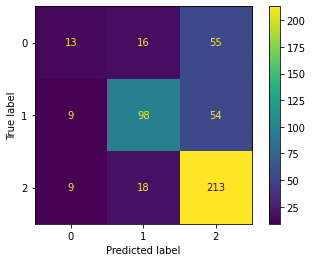

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, xv_test, y_test)

# **Save Model**

In [ ]:
import pickle as pkl

filename = 'finalized_model_naivebayes.sav'
pkl.dump(classifier, open(filename, 'wb'))

In [ ]:
pkl.dump(cv, open("vectorizer.pickle", "wb"))

In [ ]:
df[df['sentimen'] == 0]

,sentimen,Tweet
2,0,"senin,kemaren,sy,hilang,adik,sydr,subuh,muter,..."
6,0,"sy,klo,cm,flu,gk,butuh,minum,obat,obat,sakit,s..."
7,0,"alhamdulillah,moga,keluarga,sehat,inti,nya,jgn..."
8,0,"mudah,normal,ammiinn"
9,0,"jg,lebaran,kmrn,demam,panas,dingin,gk,selera,m..."
...,...,...
2404,0,"jarum,vaksin,orang,ganti,klau,jarum,vaksin,gan..."
2413,0,"ra,gagas,corona,ra,barang,miskin,gatek,ne,koro..."
2414,0,"alam,semesta,jin,jun,jenis,nya,laut,udara,lupu..."
2416,0,"cekik,ustadz,rebut,mic,mushola,nyebarin,berita"


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e89ff246-92db-441e-a8ed-3b6dd8856a37' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>